In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=eb9c965e0c7a5a5a48e566cf0262ae1c9263cc427361ffccdda61c9ddd682d0e
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

x1 = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'x1')
x2 = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'x2')
y = ctrl.Consequent(np.arange(0.004, 0.01, 0.0001), 'y')

x1_low = np.zeros_like(x1.universe)
for i, val in enumerate(x1.universe):
    if val <= 0.4:
        x1_low[i] = 1
    elif 0.4 < val <= 0.7:
        x1_low[i] = -(10/3) * val + (7/3)
x1['low'] = x1_low

x1_mid = np.zeros_like(x1.universe)
for i, val in enumerate(x1.universe):
    if 0.4 <= val <= 0.7:
        x1_mid[i] = (10/3) * val - (4/3)
    elif 0.7 <= val <= 0.85:
        x1_mid[i] = -(100/15) * val + (17/3)
x1['medium'] = x1_mid

x1_high = np.zeros_like(x1.universe)
for i, val in enumerate(x1.universe):
    if 0.7 <= val <= 0.85:
        x1_high[i] = (100/15) * val - (14/3)
    elif val >= 0.85:
        x1_high[i] = 1
x1['high'] = x1_high

x2_low = np.zeros_like(x2.universe)
for i, val in enumerate(x2.universe):
    if val <= 0.1:
        x2_low[i] = 1
    elif 0.1 < val <= 0.4:
        x2_low[i] = -(10/3) * val + (4/3)
x2['low'] = x2_low

x2_mid = np.zeros_like(x2.universe)
for i, val in enumerate(x2.universe):
    if 0.1 <= val <= 0.4:
        x2_mid[i] = (10/3) * val - (1/3)
    elif 0.4 < val <= 0.7:
        x2_mid[i] = -(10/3) * val + (7/3)
x2['medium'] = x2_mid

x2_high = np.zeros_like(x2.universe)
for i, val in enumerate(x2.universe):
    if 0.4 <= val <= 0.6:
        x2_high[i] = (10/2) * val - 2
    elif val > 0.6:
        x2_high[i] = 1
x2['high'] = x2_high

y['very_low'] = fuzz.trapmf(y.universe, [0.004, 0.004, 0.0055, 0.0065])
y['low'] = fuzz.trimf(y.universe, [0.0055, 0.006, 0.007])
y['medium'] = fuzz.trimf(y.universe, [0.0065, 0.007, 0.008])
y['high'] = fuzz.trimf(y.universe, [0.007, 0.008, 0.009])
y['very_high'] = fuzz.trapmf(y.universe, [0.008, 0.009, 0.01, 0.01])

rule1 = ctrl.Rule(x1['low'] & x2['low'], y['low'])
rule2 = ctrl.Rule(x1['low'] & x2['medium'], y['medium'])
rule3 = ctrl.Rule(x1['low'] & x2['high'], y['very_high'])
rule4 = ctrl.Rule(x1['medium'] & x2['low'], y['low'])
rule5 = ctrl.Rule(x1['medium'] & x2['medium'], y['medium'])
rule6 = ctrl.Rule(x1['medium'] & x2['high'], y['high'])
rule7 = ctrl.Rule(x1['high'] & x2['low'], y['very_low'])
rule8 = ctrl.Rule(x1['high'] & x2['medium'], y['low'])
rule9 = ctrl.Rule(x1['high'] & x2['high'], y['medium'])

dosing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
dosing = ctrl.ControlSystemSimulation(dosing_ctrl)

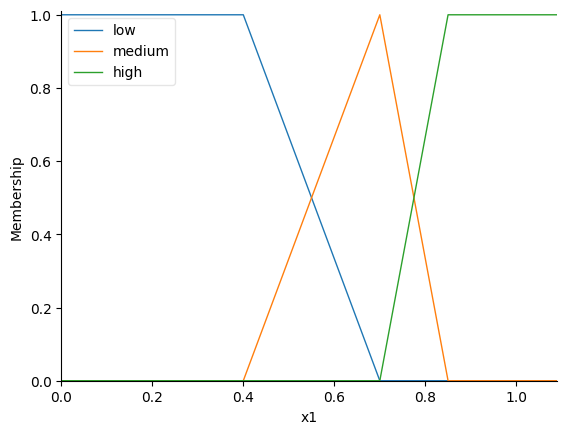

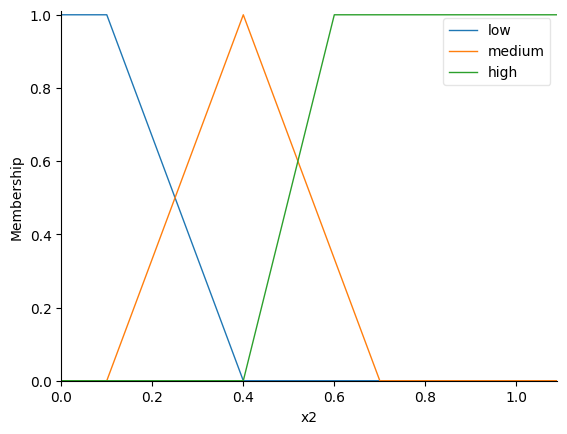

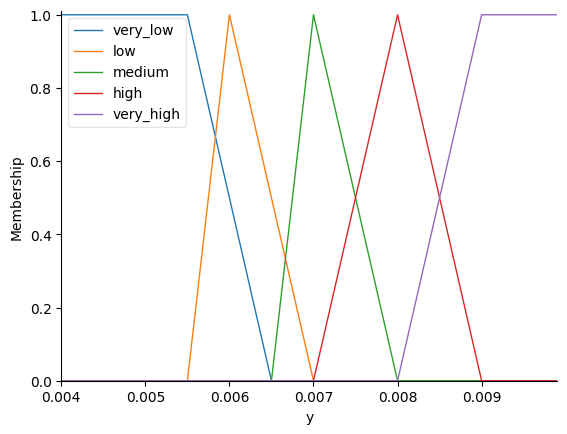

In [8]:
x1.view()
x2.view()
y.view()

In [6]:
dosing.input['x1'] = 0.5
dosing.input['x2'] = 0.6

dosing.compute()

print(dosing.output['y'])

0.008524764595103589


In [7]:
dosing.input['x1'] = 0.65
dosing.input['x2'] = 0.5

dosing.compute()

print(dosing.output['y'])

0.007857516339869286
